<h1>Análise Exploratória de Dados de filmes e séries da Netflix</h1>
<p align='justify'>A <a href="https://www.netflix.com/br/">Netflix</a> é uma plataforma de serviço online de streaming norte-americano de mídia e vídeos sob demanda por assinatura (Over The Top - OTT) lançada em 2010 e disponível em mais de 190 países <cite><a href="https://pt.wikipedia.org/wiki/Netflix#cite_note-12">[Wikipedia]</a></cite>.</p>

<p align='justify'>Como premissa para as análises e organização do projeto, é utilizada a metodologia <a href="https://www.datascience-pm.com/crisp-dm-2/">Cross Industry Standard Process for Data Mining (CRISP-DM)</a>.</p>

<pre>
<strong>Sumário</strong>

<a href="#business_understanding">1 - Entendimento do Negócio</a>
<a href="#data_understanding">2 - Entendimento dos Dados</a>
<a href="#data_preparation">3 - Preparação dos Dados</a>
<a href="#eda">4 - Visualização dos Dados</a>
<a href="#deploy">5 - Deploy - Streamlit</a>
</pre>

<h2 id=business_understanding>Entendimento do Negócio</h2>
<p align='justify'>O conjunto de dados em análise, se refere a uma lista de filmes e séries disponíveis na Netflix, com informações por exemplo do elenco, diretores, classificações, ano de lançamento, duração, entre outras mais.</p>

<h3>Dicionário de dados</h3>
<p align='justify'>Abaixo é demonstrado os campos (colunas) e sua respectiva descrição a que se refere tal dado.</p>

|Campo|Descrição|
|:-|:-|
| show_id | ID exclusivo para cada filme / programa de TV (série) |
| type | Identificador de filme ou programa de TV (série) |
| title | Título do filme/programa de TV (série) |
| director | diretor do filme |
| cast | Atores envolvidos no filme/programa de TV (série) |
| country | País onde o filme/programa foi produzido |
| date_added | Data em que foi adicionado à Netflix |
| release_year | Ano de lançamento real do filme ou programa de TV (série) |
| rating | Classificação do filme/programa de TV (série) |
| duration | Duração Total - em minutos ou número de temporadas |
| listed_in | Gênero do filme/programa de TV (série) |
| description | Descrição do filme/programa de TV (série) |

<h2 id=data_understanding>Entendimento dos Dados</h2>
<p align='justify'>Nesta etapa é realizada a exploração dos dados, com o objetivo de entender as características da base de dados e possíveis ajustes necessários a serem realizados antes da etapa de visualização.</p>

In [1]:
# Importando Bilbiotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set_style("darkgrid")

sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

# Apresenta os dados no notebook
%matplotlib inline

In [2]:
# Leitura dos dados
df = pd.read_csv("dados/netflix_titles.csv")

# Proporção dos dados em linhas e colunas
df.shape

(8807, 12)

In [3]:
# Verificando os metadados da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Verificando os tipos de dados.
print("Tipos de dados e sua frequência\n{}".format(df.dtypes.value_counts()))

Tipos de dados e sua frequência
object    11
int64      1
dtype: int64


In [5]:
# Observando a base de dados
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
# Verificação da existência de dados ausentes/faltantes
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Verificando dados nulos por registro e retornando a maior quantidade.
df.isna().sum(axis=1).max()

3

In [8]:
# Verificando a Estatística Básica dos dados numéricos.
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
# Verificando registros com 'director' ausente.
df.loc[df["director"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [10]:
# Verificando registros com 'cast' ausente.
df.loc[df["cast"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
...,...,...,...,...,...,...,...,...,...,...,...,...
8746,s8747,Movie,Winnie,Pascale Lamche,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
8755,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
8756,s8757,Movie,Woodstock,Barak Goodman,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...


In [11]:
# Verificando registros com 'country' ausente.
df.loc[df["country"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [12]:
# Verificando formato para a 'date_added' (data em que foi adicionado na Netflix)
df["date_added"][0:3]

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
Name: date_added, dtype: object

In [13]:
# Verificando a quantidade por tipo de filmes e duração. Para verificar formato da duração do filme entre minutos e temporadas.
df[["type", "duration", "show_id"]].groupby(by=["type", "duration"]).count()

show_id
type    duration          
Movie   10 min           1
        100 min        108
        101 min        116
        102 min        122
        103 min        114
...                    ...
TV Show 5 Seasons       65
        6 Seasons       33
        7 Seasons       23
        8 Seasons       17
        9 Seasons        9

[220 rows x 1 columns]

In [14]:
# Verificando o formato e a quantidade para os diretores
df["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [15]:
# Verificando o formato e a quantidade para os atores
df["cast"].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [16]:
# Verificando o formato e a quantidade para a classificação indicativa
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [17]:
# Verificando o formato e a quantidade para a classificação do tema
df["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [18]:
# Verificando formato para a 'description' (descrição do filme e série)
print(df["description"][0], end="\n\n")
print(df["description"][1], end="\n\n")
print(df["description"][2])

As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.

After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.

To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.


<h2 id=data_preparation>Preparação dos Dados</h2>
<p align='justify'>Nesta etapa é realizada a preparação dos dados, com o objetivo de ajustar as inconsistências encontradas durante a análise exploratória dos dados, permitindo que na etapa de visualização dos dados, os mesmos estejam de forma adequada a apresentação das informações.</p>

<h3>Ajustes necessários</h3>
<ul>
  <li>Correção no formato da data adicionada na Netflix (date_added).</li>
  <li>Criar coluna mês adicionada na Netflix a partir de (date_added).</li>
  <li>Criar coluna ano adicionada na Netflix a partir de (date_added).</li>
  <li>Correção do tipo para a duração (duration).</li>
  <li>Ajuste para o quantitativo de diretores (director).</li>
  <li>Ajuste para o quantitativo de atores (cast).</li>
  <li>Ajuste para o quantitativo de classificação do gênero (listed_in).</li>
  <li>Preparação da descrição (description) para representação em WordCloud.</li>
  <li>Segmentação entre filmes e séries.</li>
</ul>

In [19]:
# Correção no formato da data adicionada na Netflix (date_added).
df["date_added_aux"] = pd.to_datetime(df['date_added'])

# Criar coluna mês adicionada na Netflix a partir de (date_added).
df['month_added']=df['date_added_aux'].dt.month.astype('Int64')
df['month_name_added']=df['date_added_aux'].dt.month_name()

# Criar coluna ano adicionada na Netflix a partir de (date_added).
df['year_added'] = df['date_added_aux'].dt.year.astype('Int64')

df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_aux,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,September,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,September,2021


In [20]:
# Correção do tipo para a duração (duration).
df['duration_aux'] = df['duration'].apply(lambda x: str(x).split(" ")[0])

df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_aux,month_added,month_name_added,year_added,duration_aux
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,September,2021,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,September,2021,2


In [63]:
# Ajuste para o quantitativo de diretores (director).
qtd_diretor = df['director'].str.get_dummies(', ').sum()

df_qtd_diretor = pd.DataFrame({'diretor':qtd_diretor.index, 'qtd':qtd_diretor.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_diretor

,diretor,qtd
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
...,...,...
4988,Jovanka Vuckovic,1
4989,Bradley Walsh,1
4990,Juan Antin,1
4991,Juan Antonio de la Riva,1


In [64]:
# Ajuste para o quantitativo de atores (cast).
qtd_ator = df['cast'].str.get_dummies(', ').sum()

df_qtd_ator = pd.DataFrame({'ator':qtd_ator.index, 'qtd':qtd_ator.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_ator

,ator,qtd
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
...,...,...
36434,Chinmay Kambli,1
36435,Kumiko Aso,1
36436,Kumarakom Vasudevan,1
36437,Kumar Varun,1


In [65]:
# Ajuste para o quantitativo de classificação do tema (listed_in).
qtd_genero = df['listed_in'].str.get_dummies(', ').sum()

df_qtd_genero = pd.DataFrame({'genero':qtd_genero.index, 'qtd':qtd_genero.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_qtd_genero

,genero,qtd
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [ ]:
# Preparação da descrição (description) para representação em WordCloud.

In [68]:
# Segmentação entre filmes e séries.
# Filmes
df_filmes = df.loc[df["type"] == "Movie"]
df_filmes.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_aux,month_added,month_name_added,year_added,duration_aux
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,September,2021,90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,9,September,2021,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,9,September,2021,125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,9,September,2021,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,9,September,2021,127


In [72]:
# Segmentação entre filmes e séries.
# Séries
df_series = df.loc[df["type"] != "Movie"]
df_series.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_aux,month_added,month_name_added,year_added,duration_aux
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,September,2021,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9,September,2021,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,9,September,2021,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,9,September,2021,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,9,September,2021,1


<h2 id=eda>Visualização de Dados</h2>
<p align='justify'>Nesta etapa é realizada a visualização de dados, com o objetivo de demonstrar os insights da bae de dados, e visualização das informações dispostas na mesma.</p>

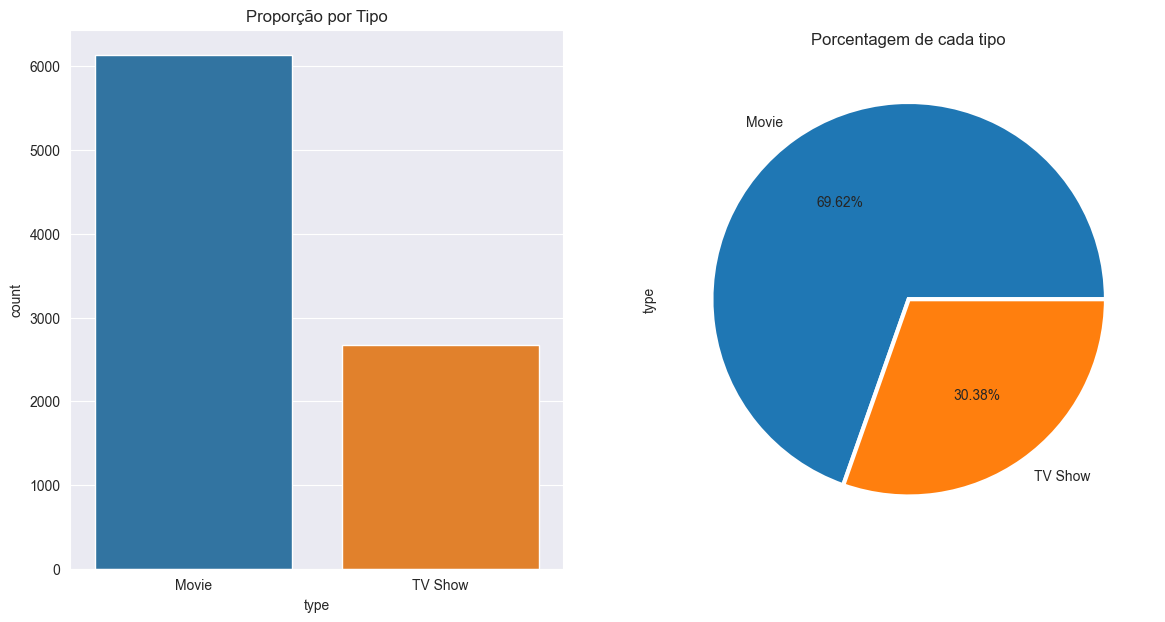

In [25]:
# Gero um gráfico básico para proporção de sexo.
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='type',data=df,ax=axs[0])
axs[0].set_title("Proporção por Tipo")

df['type'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1], autopct='%1.2f%%', 
                                  wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
axs[1].set_title("Porcentagem de cada tipo")
plt.show()

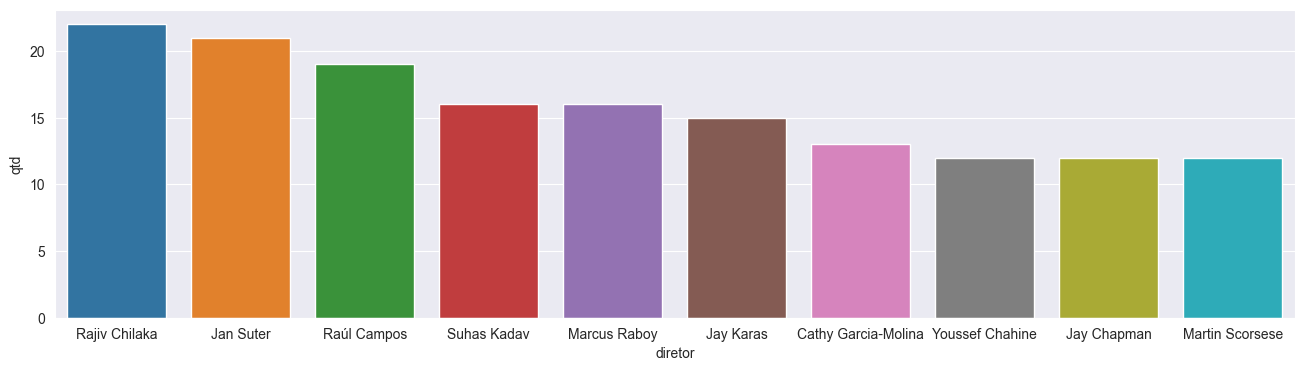

In [73]:
plt.figure(figsize=(16,4))
sns.barplot(data=df_qtd_diretor[:10], x="diretor", y="qtd")
plt.show()

<Axes: >

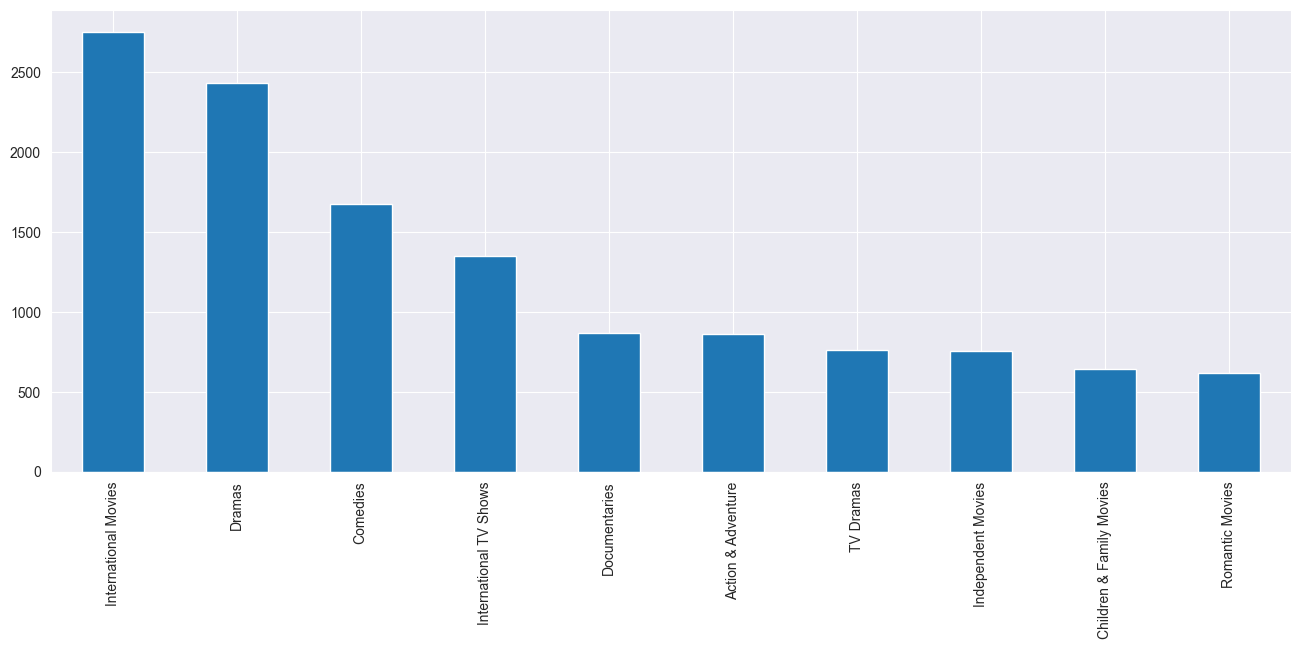

In [75]:
qtd_genero.sort_values(ascending=False)[:10].plot(kind='bar', figsize=(16, 6))

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

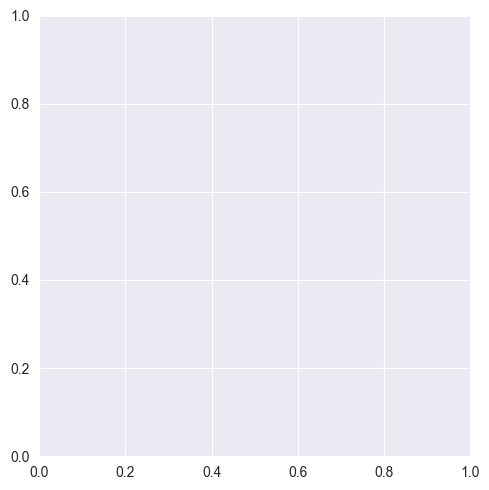

In [85]:
sns.displot(data=df, x="year_added", hue="type", kind="kde")

In [86]:
df.year_added.unique()

<IntegerArray>
[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2009, 2008,
 <NA>, 2010]
Length: 15, dtype: Int64

## Referências
- https://matplotlib.org/2.0.2/users/pyplot_tutorial.html
- https://www.kaggle.com/code/subinium/simple-matplotlib-visualization-tips
- https://medium.com/@bernardolago/gr%C3%A1ficos-usando-seaborn-61f7d23481cf
- https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
- https://www.kaggle.com/datasets/shivamb/netflix-shows
- https://libraries.io/pypi/cutecharts